In [2]:
!ls /data/container

actions.csv			  handling.csv	marker.csv  stackentry.csv
containerlocationinformation.csv  machine.csv	readme.txt  stacks.csv


In [3]:
with open('/data/container/readme.txt') as f:
    contents = f.read()
    print(contents)

 == Markers + Stacks ==
Define the layout of the yard. All lengths and positions are defined in milimeters for a marker and a stack.
A stack is a specific block on the terminal, and a marker is a place within that stack you can position a container.

Based upon this information we can draw a mark for the yard.

 == Stack entry == 
This is a container placed in a specific stack. A stack entry is placed by a stackcorrection or handling. 
A stack correction is a hard mutation done by someone in the backoffice. A handling is an actual activity done by a crane / stacker / carrier.
All stack entries with a put_mutation and without a pull mutation are currently in the yard.

 == handling == 
Alle movements of containers executed.

 == container location information ==
Shows a bit more information about where a container was or went to. A handling has a from and a to containerlocation information.

 == actions ==
Give information about the container which is transported.



In [1]:
import pandas as pd
import numpy as np

acti = pd.read_csv('/data/container/actions.csv')
con_loc = pd.read_csv('/data/container/containerlocationinformation.csv')
hand = pd.read_csv('/data/container/handling.csv')
mach = pd.read_csv('/data/container/machine.csv')
mark = pd.read_csv('/data/container/marker.csv')
stack_try = pd.read_csv('/data/container/stackentry.csv')
stacks = pd.read_csv('/data/container/stacks.csv')



/tmp/ipykernel_13057/742142831.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  hand = pd.read_csv('/data/container/handling.csv')


In [3]:
acti

,stopid,status,isemptycontainer,bookingidentifier,bookinginfo_containertype,bookinginfo_carrier,bookinginfo_customer,gatein,gateout,previousactiontype,previoussta,nextactiontype,nextstd
0,3391542,NEXT,True,24550-1,20DV,Containership CMA GmbH,Containership,NaN,NaN,NaN,NaN,ExternalAction,NaN
1,3187432,NEXT,True,23141-1,40HC,MEDITE UK LTD,MEDITE UK LTD,NaN,NaN,NaN,NaN,ExternalAction,NaN
2,5094163,FINISHED,False,26181-1,45HW,Containership CMA,Containership,2021-09-22 13:33:59.886418,2021-09-27 12:56:40.578678,ExternalAction,NaN,BargeTransportAction,2021-09-26 17:00:00.000000
3,3196883,NEXT,True,23244-1,40HW,Containership CMA GmbH,Containership,NaN,NaN,NaN,NaN,ExternalAction,NaN
4,3187544,NEXT,True,23144-1,20DV,MEDITE UK LTD,MEDITE UK LTD,NaN,NaN,NaN,NaN,ExternalAction,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13695,17700977,IN_PROGRESS,True,31333-1,20DV,OOCL,OOCL,2021-10-15 16:49:27.737697,NaN,BargeTransportAction,2021-10-15 11:00:00.000000,NaN,NaN
13696,14337159,IN_PROGRESS,True,30071-195,40HC,MEDITE UK LTD,MEDITE UK LTD,2021-10-11 20:57:18.689396,NaN,BargeTransportAction,2021-10-10 20:00:00.000000,NaN,NaN
13697,17700905,NOT_STARTED,True,31105-11,45HW,B.G. Freight Line B.V.,BGF,NaN,NaN,BargeTransportAction,NaN,NaN,NaN
13698,3165415,IN_PROGRESS,True,23051-25,40HC,Containership CMA GmbH,Containership,2021-08-10 11:00:39.813000,NaN,ExternalAction,NaN,NaN,NaN


In [4]:
con_loc

,dtype,id,cachedstring,stackentitytrainconnection,truckvisit_id,bay,tier,row,relativeyardmarkerposition,marker_id,stackentity_id,stackentry_id,yardregion_id,markerheight,stackentitytrainconnection_id,loadedwagonposition_id,loadingtask_id,location_id,shunt_id,truckpoint_id
0,TruckContainerLocationInformation,3079301,xx-382-f-Rab transport account,NaN,3079299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TruckContainerLocationInformation,3079335,xx-382-f-Rab transport account,NaN,3079299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TruckContainerLocationInformation,3157137,test1-Rab transport account,NaN,3157136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TruckContainerLocationInformation,3157167,test1-Rab transport account,NaN,3157136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TruckContainerLocationInformation,3157168,test1-Rab transport account,NaN,3157136.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72002,YardTerminalContainerLocationInformation,18489540,221-9 3,NaN,NaN,NaN,NaN,NaN,C,2351781.0,2351777.0,18489541.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
72003,TruckContainerLocationInformation,18489638,Grid 6 DA16PYP-Freightliner,NaN,18473452.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,853350.0
72004,SimpleTerminalContainerLocationInformation,18489772,Grid 7 SF16SXD-W H MALCOLM LTD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72005,YardTerminalContainerLocationInformation,18490080,221-11 3,NaN,NaN,NaN,NaN,NaN,C,2351779.0,2351777.0,18490081.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
hand.groupby(['remark'])['remark'].count()
#len(hand['endlocation'].unique())

remark
                                                                                   50
"CRUISE TERMINAL SEATS,TABLESAND TROLLYS"                                           3
"SALES BOX ""AS IS"""                                                               2
"TO GO OUT ""AS IS"" NO REPAIR AUTHERISED."                                         1
104-8                                                                               1
2006                                                                                5
2007                                                                                4
2008                                                                                5
2012                                                                                2
2014                                                                                5
2018                                                                               10
2019                                           

In [5]:
hand

,stopoveraction_id,endlocation,id,ended,planneddate,remark,startlocation,referenceaction_id,location_id,pos,...,connectedreason,connectedassigntosameexecutor,loadedwagonposition_id,hasalternatives,jobsposition,fromcontainerlocation_id,tocontainerlocation_id,shunt_id,missingagreement,reverts_id
0,3079280,NaN,3079277,NaN,NaN,NaN,NaN,3079278,738495,0.0,...,NaN,False,NaN,False,0,NaN,NaN,NaN,True,NaN
1,3187544,NaN,3187541,NaN,NaN,NaN,NaN,3187542,738495,0.0,...,NaN,False,NaN,False,163165176759087541,NaN,3187583.0,NaN,True,NaN
2,4021400,NaN,4021397,NaN,NaN,NaN,NaN,4021398,738495,0.0,...,NaN,False,NaN,False,0,NaN,NaN,NaN,True,NaN
3,3189746,NaN,3189743,NaN,NaN,NaN,NaN,3189744,738495,0.0,...,NaN,False,NaN,False,0,NaN,3189777.0,NaN,True,NaN
4,4021400,NaN,4021404,NaN,NaN,NaN,NaN,4021402,738495,1.0,...,NaN,False,NaN,False,0,NaN,NaN,NaN,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42488,17674856,NaN,17757267,2021-10-15 16:05:39.071536,NaN,NaN,NaN,17674856,738495,1.0,...,NaN,False,NaN,False,163431388235500000,17757271.0,17757712.0,NaN,False,NaN
42489,17676955,NaN,17758163,2021-10-15 16:07:14.592198,NaN,NaN,NaN,17676955,738495,1.0,...,NaN,False,NaN,False,163431398834100000,17758165.0,17758599.0,NaN,False,NaN
42490,17674242,NaN,17759383,2021-10-15 16:10:09.952992,NaN,NaN,NaN,17674242,738495,1.0,...,NaN,False,NaN,False,163431412133100000,17759392.0,17760125.0,NaN,False,NaN
42491,17673798,NaN,17760365,2021-10-15 16:11:32.566027,NaN,NaN,NaN,17673798,738495,1.0,...,NaN,False,NaN,False,163431423769200000,17760375.0,17760862.0,NaN,False,NaN


In [6]:
mach

,id,name,type,deletedon,lastseenlatitude,lastseenlongitude,showtabssearch,showtabstruck,showtabsbarge,showtabstrain,...,showmenusettings,yard_id,maxjobsvisible,maxjobsactive,showmenutasks,enableallowvesselmoves,enableallowtrainmoves,enableallowtruckmoves,limitpositionsbyrestrictedyardregions,defaultmarker_id
0,551382,Crane 1,CRANE,NaN,55.956240,-4.762564,True,False,True,False,...,True,1,250,250,False,True,False,False,False,2352136.0
1,900347,Crane 2,CRANE,NaN,51.507351,-0.127758,True,False,True,False,...,True,1,250,250,False,True,False,False,False,2352138.0
2,14068715,Grid Carrier 1,STRADDLECARRIER,NaN,55.954758,-4.764831,True,False,False,False,...,True,1,10,3,False,False,False,True,False,NaN
3,14068905,Crane 1 Carrier 1,STRADDLECARRIER,NaN,55.954697,-4.764823,True,False,False,False,...,True,1,10,3,False,False,False,True,False,NaN
4,14068805,Grid Carrier 2,STRADDLECARRIER,NaN,51.507351,-0.127758,True,False,False,False,...,True,1,10,3,False,False,False,True,False,NaN
5,551381,26,STRADDLECARRIER,2021-10-15 06:01:59.404581,55.955535,-4.763558,True,False,False,False,...,True,1,10,3,False,False,False,True,False,NaN
6,15626213,Crane 2 Carrier 2,STRADDLECARRIER,NaN,55.955077,-4.765668,True,False,False,False,...,True,1,10,3,False,False,False,True,False,NaN
7,2100439,Stacker ECH 4,REACHSTACKER,NaN,55.953066,-4.760645,True,False,False,False,...,True,1,10,10,False,True,False,False,False,NaN
8,15252264,Crane 3 Carrier 2,STRADDLECARRIER,NaN,55.954722,-4.764885,True,False,False,False,...,True,1,10,3,False,False,False,True,False,NaN
9,2100442,32,STRADDLECARRIER,2021-10-15 06:01:42.584274,55.954256,-4.764288,True,False,False,False,...,True,1,10,3,False,False,False,True,False,NaN


In [7]:
mark

,id,stack_id,name,rowrange,depth,stackdesignation_id,stackdesignationpriority,maxheight,deletedon
0,5272677,5269539,QL1-16,"[0,6096)",0,NaN,0,NaN,NaN
1,5272678,5269539,QL1-15,"[6096,12192)",0,NaN,0,NaN,NaN
2,5272679,5269539,QL1-14,"[12192,18288)",0,NaN,0,NaN,NaN
3,5272680,5269539,QL1-13,"[18288,24384)",0,NaN,0,NaN,NaN
4,5272681,5269539,QL1-12,"[24384,30480)",0,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1193,2351560,2351553,204-6,"[36600,42700)",0,17487479.0,0,NaN,NaN
1194,2351562,2351553,204-4,"[48800,54900)",0,17487479.0,0,NaN,NaN
1195,2351564,2351553,204-2,"[61000,67100)",0,17487479.0,0,NaN,NaN
1196,2352126,2352125,A,"[0,5000)",0,NaN,0,NaN,NaN


In [8]:
stack_try

,id,stack_id,rowrange,depth,heightrange,terminalstopoveraction_id,put_handling_id,put_correction_id,pull_handling_id,pull_correction_id,yardmovehandling_id,container_number,container_relative_marker_position,container_height,marker_id,reachstacker_moves,crane_moves,locationinformation_id,straddlecarrier_moves
0,3920629,2352069,"[10,12202)",0,"[0,2896)",3122918,3920475.0,NaN,5347663.0,NaN,NaN,NaN,1,0,NaN,0.0,0.0,3920628.0,0.0
1,4159223,2351021,"[12202,24394)",0,"[0,2896)",3119380,4159212.0,NaN,3119385.0,NaN,NaN,NaN,1,0,NaN,0.0,0.0,4159222.0,0.0
2,8281557,2352127,"[0,1)",0,"[0,1)",8223917,NaN,8281555.0,8238361.0,NaN,NaN,NaN,1,0,NaN,NaN,NaN,NaN,NaN
3,4146707,2351245,"[61002,73194)",0,"[0,2621)",3106620,4146688.0,NaN,6423134.0,NaN,NaN,NaN,1,0,NaN,0.0,0.0,4146706.0,0.0
4,5620843,2387709,"[0,1)",0,"[0,1)",5563630,5614146.0,NaN,5563627.0,NaN,NaN,NaN,1,0,NaN,0.0,0.0,5620842.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18164,17758600,2352131,"[0,1)",0,"[0,1)",17676955,17758163.0,NaN,NaN,NaN,NaN,NaN,1,0,NaN,0.0,0.0,17758599.0,0.0
18165,17759384,2352135,"[0,1)",0,"[0,1)",17674242,17674238.0,NaN,17759383.0,NaN,NaN,NaN,1,0,NaN,0.0,0.0,17759392.0,0.0
18166,17760366,2352135,"[0,1)",0,"[0,1)",17673798,17673794.0,NaN,17760365.0,NaN,NaN,NaN,1,0,NaN,0.0,0.0,17760375.0,0.0
18167,17760863,2352131,"[0,1)",0,"[0,1)",17673798,17760365.0,NaN,NaN,NaN,NaN,NaN,1,0,NaN,0.0,0.0,17760862.0,0.0


In [2]:
stacks

,id,name,deletedon,maxheight,maxdepth,maxlength,positionx,positiony,rotation,yard_id,...,rowdepth,infinitespace,yardregion_id,snapwithinmarker,defaultrelativemarkerposition,reversestacksuggestiondirection,opentop,openbottom,openright,openleft
0,10726317,CPS YARD,NaN,8750,3,30500,161540,207200,0,1,...,2438,True,NaN,False,NaN,False,True,True,True,True
1,2350937,716,NaN,8750,1,42700,0,57960,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
2,2350945,717,NaN,8750,1,42700,0,62100,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
3,2350953,718,NaN,8750,1,42700,0,66240,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
4,2350961,719,NaN,8750,1,42700,0,70380,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,2352008,RP6,NaN,8750,1,13750,103900,239020,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
146,2352020,RP10,NaN,8750,1,13750,103900,255580,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
147,2352005,RP5,NaN,8750,1,13750,103900,234880,0,1,...,2440,False,NaN,True,C,False,True,True,True,False
148,2351987,RPB,NaN,8750,1,13750,103900,210040,0,1,...,2440,False,NaN,True,C,False,True,True,True,False


/tmp/ipykernel_13057/4098713636.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacks0['endlength'] = stacks0['positionx'] + stacks0['maxlength']
/tmp/ipykernel_13057/4098713636.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stacks90['endlength'] = stacks90['positiony'] + stacks90['maxlength']
/tmp/ipykernel_13057/4098713636.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

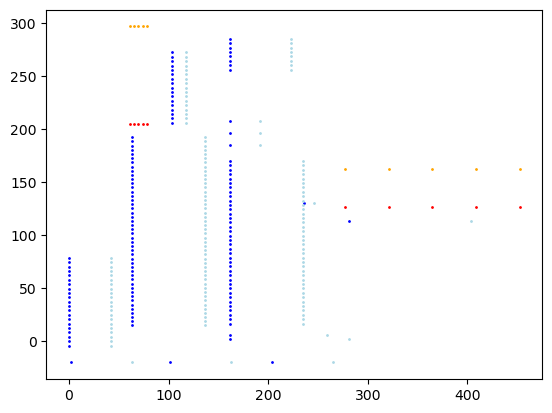

In [4]:
import matplotlib.pyplot as plt
import numpy as np

stacks0 = stacks[stacks['rotation'] == 0]
stacks90 = stacks[stacks['rotation'] == 90]
stacks0['endlength'] = stacks0['positionx'] + stacks0['maxlength']
stacks90['endlength'] = stacks90['positiony'] + stacks90['maxlength']
stacks0['positionx'] = stacks0['positionx']/1000
stacks0['positiony'] = stacks0['positiony']/1000
stacks0['endlength'] = stacks0['endlength']/1000
stacks90['positionx'] = stacks90['positionx']/1000
stacks90['positiony'] = stacks90['positiony']/1000
stacks90['endlength'] = stacks90['endlength']/1000

plt.scatter(stacks0['positionx'],stacks0['positiony'],c='blue',s=1)
plt.scatter(stacks90['positionx'],stacks90['positiony'],c='red',s=1)
plt.scatter(stacks0['endlength'],stacks0['positiony'],c='lightblue',s=1)
plt.scatter(stacks90['positionx'],stacks90['endlength'],c='orange',s=1)

In [32]:
numpy.diff(stx)

NameError: name 'numpy' is not defined

In [17]:
sty = stacks['positiony'].unique()
sty.sort()
sty

array([-20000,  -4140,      0,   2160,   4140,   6000,   8280,  12420,
        14860,  16560,  16660,  18800,  20700,  20800,  22740,  24840,
        24940,  26680,  28980,  29080,  30620,  33120,  33220,  34560,
        37260,  37360,  38500,  41400,  41500,  42440,  45540,  45640,
        46380,  49680,  49780,  50320,  53820,  53920,  54260,  57960,
        58060,  58200,  62100,  62140,  62200,  66080,  66240,  66340,
        70020,  70380,  70480,  73960,  74520,  74620,  77900,  78660,
        78760,  81840,  82900,  85780,  87040,  89720,  91180,  93660,
        95320,  97600,  99460, 101540, 103600, 105480, 107740, 109420,
       111880, 113360, 113420, 116020, 117300, 120160, 121240, 124300,
       125180, 126100, 128440, 129120, 130160, 132580, 133060, 136720,
       137000, 140860, 140940, 144880, 145000, 148820, 149140, 152760,
       153280, 156700, 157420, 160640, 161560, 164580, 165700, 168520,
       169840, 172460, 176400, 180340, 184280, 184680, 188220, 192160,
      

In [43]:
print(mark['stackdesignation_id'].min())
print(mark['stackdesignation_id'].max())

2434256.0
18389855.0


In [40]:
print(hand['tocontainerlocation_id'].min())
print(hand['tocontainerlocation_id'].max())

3167680.0
18490080.0


In [41]:
print(stack_try['locationinformation_id'].min())
print(stack_try['locationinformation_id'].max())

3184816.0
18490080.0


In [30]:
list(hand.columns)

['stopoveraction_id',
 'endlocation',
 'id',
 'ended',
 'planneddate',
 'remark',
 'startlocation',
 'referenceaction_id',
 'location_id',
 'pos',
 'visible',
 'priority',
 'started',
 'performer_id',
 'handlingcategory',
 'handlingtype',
 'handlingmethod',
 'deletedon',
 'autogenerated',
 'debtor_id',
 'machine_id',
 'promotiondate',
 'startrelativemarkerposition',
 'endrelativemarkerposition',
 'wagon_index',
 'connectedautoprioritize',
 'connectedbubble',
 'connectedreason',
 'connectedassigntosameexecutor',
 'loadedwagonposition_id',
 'hasalternatives',
 'jobsposition',
 'fromcontainerlocation_id',
 'tocontainerlocation_id',
 'shunt_id',
 'missingagreement',
 'reverts_id']

In [29]:
list(mach.columns)

['id',
 'name',
 'type',
 'deletedon',
 'lastseenlatitude',
 'lastseenlongitude',
 'showtabssearch',
 'showtabstruck',
 'showtabsbarge',
 'showtabstrain',
 'showtabsmoves',
 'showmenucockpit',
 'showmenugate',
 'showmenudamage',
 'showmenusettings',
 'yard_id',
 'maxjobsvisible',
 'maxjobsactive',
 'showmenutasks',
 'enableallowvesselmoves',
 'enableallowtrainmoves',
 'enableallowtruckmoves',
 'limitpositionsbyrestrictedyardregions',
 'defaultmarker_id']

In [28]:
list(stacks.columns)

['id',
 'name',
 'deletedon',
 'maxheight',
 'maxdepth',
 'maxlength',
 'positionx',
 'positiony',
 'rotation',
 'yard_id',
 'createdon',
 'rowdepth',
 'infinitespace',
 'yardregion_id',
 'snapwithinmarker',
 'defaultrelativemarkerposition',
 'reversestacksuggestiondirection',
 'opentop',
 'openbottom',
 'openright',
 'openleft']

In [31]:
list(acti.columns)

['stopid',
 'status',
 'isemptycontainer',
 'bookingidentifier',
 'bookinginfo_containertype',
 'bookinginfo_carrier',
 'bookinginfo_customer',
 'gatein',
 'gateout',
 'previousactiontype',
 'previoussta',
 'nextactiontype',
 'nextstd']

In [32]:
list(con_loc.columns)

['dtype',
 'id',
 'cachedstring',
 'stackentitytrainconnection',
 'truckvisit_id',
 'bay',
 'tier',
 'row',
 'relativeyardmarkerposition',
 'marker_id',
 'stackentity_id',
 'stackentry_id',
 'yardregion_id',
 'markerheight',
 'stackentitytrainconnection_id',
 'loadedwagonposition_id',
 'loadingtask_id',
 'location_id',
 'shunt_id',
 'truckpoint_id']

In [33]:
list(mark.columns)

['id',
 'stack_id',
 'name',
 'rowrange',
 'depth',
 'stackdesignation_id',
 'stackdesignationpriority',
 'maxheight',
 'deletedon']

In [35]:
list(stack_try.columns)

['id',
 'stack_id',
 'rowrange',
 'depth',
 'heightrange',
 'terminalstopoveraction_id',
 'put_handling_id',
 'put_correction_id',
 'pull_handling_id',
 'pull_correction_id',
 'yardmovehandling_id',
 'container_number',
 'container_relative_marker_position',
 'container_height',
 'marker_id',
 'reachstacker_moves',
 'crane_moves',
 'locationinformation_id',
 'straddlecarrier_moves']